In [1]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import zarr
import gcsfs

In [2]:
vert_ds = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/vert_ds.nc')

In [3]:
def monthly_fit(sst_dataset, toa_dataset):
    """
    Monthly regression
    
    """
    SST_TOAfit = xr.DataArray(np.zeros((15,88,179)), dims=['name','lat','lon'])
    model_index = 0
    for model in toa_dataset.coords['name'].values:
        lat_index = 0
        for lat in toa_dataset.coords['lat'].values:
            lon_index = 0
            for lon in toa_dataset.coords['lon'].values:
                SST_slice = sst_dataset.sel(lat=lat).sel(lon=lon).sel(name=model)
                TOA_slice = toa_dataset.sel(lat=lat).sel(lon=lon).sel(name=model)
                idx = np.isfinite(SST_slice) & np.isfinite(TOA_slice)
                if not SST_slice[idx].size or not TOA_slice[idx].size:
                    break
                SST_TOAfit[model_index, lat_index, lon_index] = np.polyfit(SST_slice[idx], TOA_slice[idx], deg=1)[0]     
                lon_index += 1
            lat_index += 1
        model_index += 1
        print(model)

    SST_TOAfit.coords['lon'] = toa_dataset['lon'].values
    SST_TOAfit.coords['lat'] = toa_dataset['lat'].values
    SST_TOAfit.coords['name'] = toa_dataset['name'].values
    SST_TOAfit
    return SST_TOAfit

# Control SST + TOA

In [2]:
dataarray_SST_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_sst_piControl_interp_2x2_15memens_2.nc')
dataarray_SST_cont.load()

<xarray.DataArray 'ts' (name: 15, time: 1800, lat: 88, lon: 179)>
array([[[[243.18496246, 243.0430336 , 242.90864563, ..., 243.75744705,
          243.6136322 , 243.47025681],
         [243.91621094, 243.58426437, 243.37599564, ..., 245.18914566,
          244.86694336, 244.54597549],
         [245.59149551, 245.1326683 , 244.65911102, ..., 247.68568878,
          247.14878464, 246.61694489],
         ...,
         [239.55025787, 239.92131195, 240.25101852, ..., 237.72741852,
          237.87510681, 238.06498566],
         [238.32813339, 238.6320961 , 238.78931427, ..., 237.56899948,
          237.70903015, 237.84785614],
         [236.66961594, 236.70400772, 236.74081421, ..., 236.53036346,
          236.56542206, 236.60032578]],

        [[231.3177597 , 231.15438766, 231.01077652, ..., 231.97694626,
          231.81131363, 231.64621048],
         [232.09978867, 231.65678024, 231.46744919, ..., 233.87158051,
          233.43950653, 233.00966873],
         [234.51739807, 234.01972885, 233.50682068, ..., 237.02090225,
          236.37061691, 235.73139725],
...
         [239.85893473, 240.28726807, 240.73166911, ..., 237.98081543,
          238.45183105, 238.93692871],
         [238.97602539, 239.155896  , 239.35331217, ..., 238.13704427,
          238.35337321, 238.54144287],
         [237.62039225, 237.64485596, 237.68217773, ..., 237.59299642,
          237.61521403, 237.64759521]],

        [[253.71316243, 253.57433838, 253.51084391, ..., 253.77210693,
          253.71278076, 253.70275635],
         [254.94514567, 254.84055176, 254.62434896, ..., 255.78906657,
          255.57228597, 255.37980957],
         [256.39857015, 255.95933594, 255.74997152, ..., 257.65570394,
          257.59882813, 257.5030957 ],
         ...,
         [240.14667236, 240.55992432, 241.02220052, ..., 237.61468994,
          238.39070231, 239.04007568],
         [238.17685954, 238.55985107, 238.98061117, ..., 236.93647054,
          237.22871908, 237.55179443],
         [237.86961751, 238.05763672, 238.27799886, ..., 237.25263997,
          237.39740804, 237.54483154]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 2000-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'HadGEM3-GC31-LL'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Surface Temperature
    original_name:  ts
    standard_name:  surface_temperature
    units:          K

In [3]:
dataarray_TOA_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_piControl_2x2_15memens.nc')
dataarray_TOA_cont.load()

<xarray.DataArray (name: 15, time: 1500, lat: 88, lon: 179)>
array([[[[ -36.71150756,  -36.54298704,  -36.33610696, ...,
           -37.38284098,  -37.20380278,  -36.99700632],
         [ -38.26714412,  -37.84095571,  -37.39639549, ...,
           -40.08008474,  -39.55886911,  -39.16305471],
         [ -41.73647855,  -41.19594878,  -40.66258   , ...,
           -43.8332355 ,  -43.39299072,  -42.8394849 ],
         ...,
         [-157.2955542 , -157.20398975, -157.24631113, ...,
          -157.04223199, -157.12361213, -157.20145457],
         [-157.91162539, -157.93890508, -157.92696253, ...,
          -158.0758101 , -158.08202094, -157.97277022],
         [-158.18000831, -158.15537339, -158.11918551, ...,
          -158.34951912, -158.36058747, -158.20792706]],

        [[ -72.54225605,  -72.23584524,  -71.96492355, ...,
           -73.75649012,  -73.41867717,  -73.11533206],
         [ -74.15452931,  -73.55173268,  -73.10056357, ...,
           -76.46964449,  -75.84088912,  -75.23099848],
         [ -76.72662193,  -75.94243471,  -75.26338409, ...,
           -80.29527136,  -79.42623765,  -78.51133988],
...
         [          nan, -177.21646576, -177.22916412, ...,
          -177.50896149, -177.25967407, -176.97445221],
         [          nan, -177.78093567, -177.78569031, ...,
          -177.76291809, -177.88256836, -177.9171524 ],
         [          nan, -177.85298462, -177.91111755, ...,
          -177.02633362, -177.28897858, -177.41907349]],

        [[          nan,  -21.40572815,  -21.54139709, ...,
           -21.56503296,  -21.69248962,  -21.78683167],
         [          nan,  -24.59854126,  -24.15023804, ...,
           -24.04949036,  -23.91413879,  -24.20950623],
         [          nan,  -25.06199951,  -24.40362549, ...,
           -26.62183838,  -26.27607727,  -26.09689636],
         ...,
         [          nan, -168.96226959, -169.16797638, ...,
          -167.20513611, -167.34837341, -167.680159  ],
         [          nan, -165.98021698, -166.10280609, ...,
          -164.80603638, -164.98551178, -165.21567078],
         [          nan, -164.62158661, -164.78772736, ...,
          -164.80925903, -164.81732941, -164.86381531]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'GISS-E2-1-H'

In [20]:
model_index = 0
dataarray_SST = dataarray_SST.isel(time=slice(0,1500))

SST_TOAfit = xr.DataArray(np.zeros((15,88,179)), dims=['name','lat','lon'])

for model in dataarray_TOA.coords['name'].values:
    lat_index = 0
    for lat in dataarray_TOA.coords['lat'].values:
        lon_index = 0
        for lon in dataarray_TOA.coords['lon'].values:
            #SST_TOAfit[model_index, lat_index, lon_index] = np.polyfit(dataarray_SST.sel(lat=lat).sel(lon=lon).sel(name=model), 
            #                                                           dataarray_TOA.sel(lat=lat).sel(lon=lon).sel(name=model), deg=1)
            SST_slice = dataarray_SST.sel(lat=lat).sel(lon=lon).sel(name=model)
            TOA_slice = dataarray_TOA.sel(lat=lat).sel(lon=lon).sel(name=model)
            idx = np.isfinite(SST_slice) & np.isfinite(TOA_slice)
            if not SST_slice[idx].size or not TOA_slice[idx].size:
                break
            SST_TOAfit[model_index, lat_index, lon_index] = np.polyfit(SST_slice[idx], TOA_slice[idx], deg=1)[0]     
            lon_index += 1
        lat_index += 1
    model_index += 1
    print(model)
            
SST_TOAfit.coords['lon'] = dataarray_SST['lon'].values
SST_TOAfit.coords['lat'] = dataarray_SST['lat'].values
SST_TOAfit.coords['name'] = dataarray_SST['name'].values
SST_TOAfit

BCC-CSM2-MR
BCC-ESM1
CNRM-CM6-1
CNRM-ESM2-1
CanESM5-CanOE
CanESM5
GISS-E2-1-G
HadGEM3-GC31-LL
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MPI-ESM-1-2-HAM
GFDL-CM4
GFDL-ESM4
GISS-E2-1-H


<xarray.DataArray (name: 15, lat: 88, lon: 179)>
array([[[3.07766536, 3.06076531, 3.04643553, ..., 3.16291096,
         3.1385411 , 3.11724952],
        [2.99204716, 2.96106296, 2.93557295, ..., 3.1619912 ,
         3.11204265, 3.06833671],
        [2.96505243, 2.91438379, 2.87260378, ..., 3.2498782 ,
         3.16824727, 3.09280235],
        ...,
        [3.68298997, 3.6669659 , 3.64725008, ..., 3.67183646,
         3.68099258, 3.6749783 ],
        [3.55731545, 3.55764372, 3.56750296, ..., 3.53469064,
         3.53587188, 3.53898794],
        [3.47002377, 3.47653974, 3.4796431 , ..., 3.43624493,
         3.44897967, 3.45286734]],

       [[3.04762965, 3.03245853, 3.01830032, ..., 3.10961519,
         3.09372152, 3.07817657],
        [2.91995427, 2.89483905, 2.87145876, ..., 3.03052192,
         3.00140137, 2.97368278],
        [2.85208078, 2.82692118, 2.80253195, ..., 2.97648968,
         2.94184887, 2.90946106],
...
        [3.42043843, 3.44049264, 3.46414405, ..., 3.30987296,
         3.34172019, 3.37151664],
        [3.08754568, 3.11136111, 3.13375094, ..., 3.01794685,
         3.03512592, 3.05176775],
        [2.95640608, 2.9645851 , 2.97332064, ..., 2.92217982,
         2.93095848, 2.9395914 ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'HadGEM3-GC31-LL'

In [21]:
SST_TOAfit_mean = SST_TOAfit.mean('name')

Text(0.5, 1.0, 'Regression of piControl SST and TOA Radiation (N=15)')

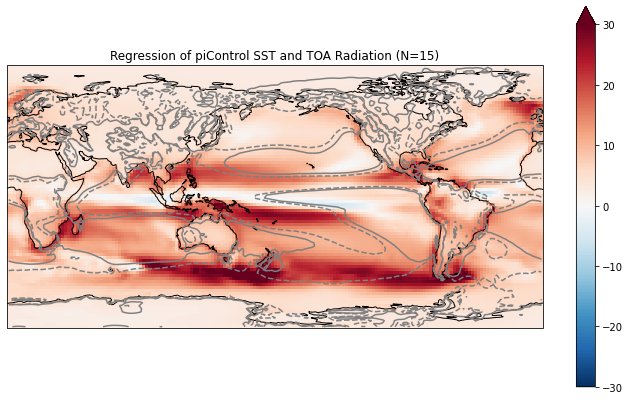

In [30]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
SST_TOAfit_mean.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-30, vmax=30, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Regression of piControl SST and TOA Radiation (N=15)')

# Historical SST + TOA Radiation

In [6]:
dataarray_SST_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_sst_historical_interp_2x2_15memens.nc')
dataarray_SST_hist.load()

<xarray.DataArray 'ts' (name: 15, time: 1500, lat: 88, lon: 179)>
array([[[[245.1859862 , 245.05620307, 244.92043969, ..., 245.75533118,
          245.6111197 , 245.45203602],
         [245.88063364, 245.58245054, 245.37763481, ..., 247.19417147,
          246.82641607, 246.45907957],
         [248.01682291, 247.3577596 , 246.7102842 , ..., 250.3653935 ,
          249.80158043, 249.32374638],
         ...,
         [245.06593436, 245.39194295, 245.63474012, ..., 241.69775934,
          242.72476049, 243.74282717],
         [242.68845289, 243.00853387, 243.20048054, ..., 241.26501357,
          241.50763409, 241.96129718],
         [241.32728171, 241.53171362, 241.72946795, ..., 240.6040532 ,
          240.76747683, 240.98713307]],

        [[233.05632464, 232.91759595, 232.7670064 , ..., 233.7315024 ,
          233.52934174, 233.37129233],
         [233.43740169, 233.17238575, 232.67125688, ..., 235.19431216,
          234.55833563, 234.25745403],
         [237.49387496, 236.81338542, 236.08487523, ..., 239.89354951,
          239.37231635, 238.98301092],
...
         [253.5345807 , 253.62416859, 253.69687856, ..., 252.92499209,
          253.30769977, 253.40706583],
         [252.19553908, 252.21278911, 252.23002734, ..., 252.18424604,
          252.13351638, 252.15487338],
         [250.74838405, 250.75130838, 250.75423612, ..., 250.80454796,
          250.78808492, 250.7716162 ]],

        [[238.65758206, 238.53384663, 238.41010391, ..., 239.38124703,
          239.19216301, 239.00308465],
         [238.65255689, 238.40425581, 238.15596025, ..., 239.97529907,
          239.60325604, 239.27263674],
         [240.91002447, 240.37961032, 239.84836888, ..., 242.76911442,
          242.38854589, 241.9071123 ],
         ...,
         [248.88179831, 249.23645723, 249.55722985, ..., 247.64610281,
          247.93472235, 248.24773801],
         [248.91423681, 249.04374118, 249.17324417, ..., 248.24221544,
          248.36503936, 248.55882082],
         [248.6031107 , 248.60378665, 248.60446968, ..., 248.54380519,
          248.56065276, 248.5774984 ]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'IPSL-CM6A-LR' 'GISS-E2-1-G' ... 'NESM3' 'EC-Earth3'
Attributes:
    cell_measures:       area: areacella
    cell_methods:        area: time: mean
    description:         Surface temperature (skin for open ocean)
    history:             none
    interval_operation:  900 s
    interval_write:      1 month
    long_name:           Surface Temperature
    online_operation:    average
    standard_name:       surface_temperature
    units:               K

In [3]:
dataarray_TOA_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_historical_2x2_15memens.nc')
dataarray_TOA_hist.load()

<xarray.DataArray (name: 15, time: 1500, lat: 88, lon: 179)>
array([[[[ -40.49030979,  -40.32841723,  -40.15647016, ...,
           -41.32518471,  -41.08868307,  -40.84039917],
         [ -42.01022983,  -41.68497341,  -41.42744581, ...,
           -43.62237048,  -43.20047472,  -42.74571177],
         [ -43.5138593 ,  -42.96715505,  -42.56623642, ...,
           -46.3825265 ,  -45.57779348,  -44.89683021],
         ...,
         [-166.95976342, -167.16756319, -167.15837071, ...,
          -166.39793223, -166.75592155, -166.85977288],
         [-165.70908805, -165.75021959, -165.77962253, ...,
          -165.30953577, -165.44865076, -165.59472732],
         [-164.95253744, -165.03962522, -165.17467822, ...,
          -164.87384663, -165.06615504, -164.99160661]],

        [[ -77.64925593,  -77.38441756,  -77.12490828, ...,
           -78.73775416,  -78.47043612,  -78.18227489],
         [ -79.8017584 ,  -79.43750621,  -79.0456798 , ...,
           -81.49615103,  -81.01476512,  -80.59659103],
         [ -83.09610685,  -82.41270824,  -81.7879474 , ...,
           -86.35207228,  -85.49494116,  -84.66419917],
...
         [-190.00311939, -190.80699795, -191.51516202, ...,
          -188.44678882, -188.92862686, -188.95906369],
         [-187.95129824, -187.72854749, -188.11896437, ...,
          -186.10026971, -186.82349829, -186.83598057],
         [-186.86608359, -187.0886825 , -187.43187681, ...,
          -184.20199573, -184.72399066, -185.55639261]],

        [[ -24.43813969,  -24.84779971,  -24.92879227, ...,
           -25.30986894,  -24.82006257,  -24.86068453],
         [ -26.79795573,  -26.78310288,  -26.76178377, ...,
           -27.7577471 ,  -27.40283659,  -27.06011935],
         [ -29.38564924,  -29.06398698,  -28.67490385, ...,
           -31.41178425,  -31.01536289,  -30.53263186],
         ...,
         [-165.12963183, -165.23172683, -165.41421174, ...,
          -164.31337828, -164.29590919, -164.47407868],
         [-165.02561653, -165.35161079, -165.51151213, ...,
          -164.49130426, -164.62586611, -164.51511954],
         [-165.1235772 , -165.26552377, -165.37453287, ...,
          -165.07025222, -164.99571096, -165.02692454]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'NESM3'

In [7]:
sst_toa_hist_fit = monthly_fit(dataarray_SST_hist, dataarray_TOA_hist)

BCC-CSM2-MR
BCC-ESM1
CESM2
CNRM-CM6-1
CNRM-ESM2-1
CanESM5-CanOE
CanESM5
EC-Earth3
GISS-E2-1-G
HadGEM3-GC31-LL
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MPI-ESM-1-2-HAM
NESM3


In [8]:
sst_toa_hist_fit

<xarray.DataArray (name: 15, lat: 88, lon: 179)>
array([[[3.10215635, 3.08456986, 3.07181593, ..., 3.18550015,
         3.16283069, 3.14129981],
        [3.01371266, 2.98315734, 2.95705974, ..., 3.18117624,
         3.13304885, 3.08840417],
        [2.98714219, 2.93794278, 2.89723584, ..., 3.26669162,
         3.18534284, 3.1107185 ],
        ...,
        [3.74917092, 3.74201676, 3.72885971, ..., 3.73304158,
         3.74201486, 3.73761005],
        [3.62734959, 3.62849054, 3.63786938, ..., 3.60764045,
         3.60884525, 3.61190089],
        [3.56346071, 3.56883199, 3.57090209, ..., 3.53880223,
         3.54835161, 3.55101141]],

       [[3.06039468, 3.04538617, 3.03122744, ..., 3.12128745,
         3.10588553, 3.09008392],
        [2.92493494, 2.89929934, 2.87648179, ..., 3.03581529,
         3.00645669, 2.9776102 ],
        [2.84768488, 2.82060185, 2.79675574, ..., 2.97496894,
         2.93977677, 2.90681278],
...
        [3.5407173 , 3.5590774 , 3.57965817, ..., 3.51303021,
         3.50994621, 3.51466606],
        [3.30090845, 3.32300306, 3.34601147, ..., 3.2259623 ,
         3.24293149, 3.26126578],
        [3.18635694, 3.19348798, 3.20144255, ..., 3.15768834,
         3.16524715, 3.17225249]],

       [[2.70262498, 2.70027201, 2.70000943, ..., 2.73994122,
         2.72926208, 2.71915944],
        [2.48167261, 2.47463412, 2.4773924 , ..., 2.56393748,
         2.53539865, 2.51368796],
        [2.57856275, 2.56818264, 2.56847362, ..., 2.724422  ,
         2.67322669, 2.63069562],
        ...,
        [2.81967317, 2.83712954, 2.86464804, ..., 2.79471533,
         2.78817089, 2.79328927],
        [2.71460992, 2.72741897, 2.74145437, ..., 2.67352153,
         2.68022123, 2.68527478],
        [2.71615693, 2.71966489, 2.72398687, ..., 2.70453994,
         2.70764459, 2.71059584]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'NESM3'

In [9]:
sst_toa_hist_fit_mean = sst_toa_hist_fit.mean('name')

Text(0.5, 1.0, 'Regression of Historical SST and TOA Radiation (N=15)')

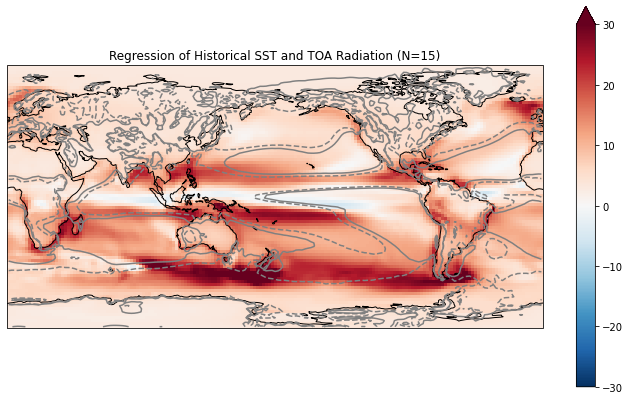

In [13]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_toa_hist_fit_mean.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-30, vmax=30, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Regression of Historical SST and TOA Radiation (N=15)')

# SST + Surface Radiation

In [4]:
surface_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_hist_interp_15memens.nc')
surface_hist.load()

<xarray.DataArray (name: 15, time: 1500, lat: 88, lon: 179)>
array([[[[ 4.90165056e+00,  5.02030481e+00,  5.14833517e+00, ...,
           4.42925605e+00,  4.56485558e+00,  4.66646627e+00],
         [ 4.59733384e+00,  4.82168076e+00,  4.98723783e+00, ...,
           3.81284670e+00,  3.96564983e+00,  4.19904078e+00],
         [ 4.02822119e+00,  4.18452456e+00,  4.37871187e+00, ...,
           3.16195200e+00,  3.32776068e+00,  3.54453707e+00],
         ...,
         [-3.46124473e+01, -3.68575683e+01, -3.48434307e+01, ...,
          -3.44554857e+01, -3.57958553e+01, -3.51358641e+01],
         [-3.32735436e+01, -3.38893754e+01, -3.38385741e+01, ...,
          -3.26756667e+01, -3.27437460e+01, -3.27906597e+01],
         [-3.46177860e+01, -3.51192427e+01, -3.58445793e+01, ...,
          -3.36690564e+01, -3.51623532e+01, -3.55597275e+01]],

        [[-2.86197465e+00, -2.93874279e+00, -3.03927916e+00, ...,
          -2.56575976e+00, -2.67832265e+00, -2.74031600e+00],
         [-2.12785747e+00, -2.32005957e+00, -2.40554916e+00, ...,
          -1.76238901e+00, -1.80849465e+00, -1.92474648e+00],
         [-1.41721594e+00, -1.48068312e+00, -1.55627523e+00, ...,
          -9.75113796e-01, -1.02866159e+00, -1.15787975e+00],
...
         [-2.78088935e+01, -2.78776526e+01, -2.93542580e+01, ...,
          -1.90225108e+01, -1.93425562e+01, -2.20628261e+01],
         [-2.44885393e+01, -2.53342339e+01, -2.67468318e+01, ...,
          -1.73685251e+01, -2.00562108e+01, -2.04017211e+01],
         [-2.17705019e+01, -2.34594400e+01, -2.61322040e+01, ...,
          -2.20741132e+01, -2.23441102e+01, -2.22555440e+01]],

        [[ 2.00020313e+01,  2.02547712e+01,  2.04408099e+01, ...,
           1.97594779e+01,  1.98033927e+01,  1.99940870e+01],
         [ 1.87190357e+01,  1.87650739e+01,  1.88504934e+01, ...,
           1.84766899e+01,  1.86177975e+01,  1.85550708e+01],
         [ 1.79714223e+01,  1.81370286e+01,  1.83174774e+01, ...,
           1.72408851e+01,  1.75626934e+01,  1.76884266e+01],
         ...,
         [-3.28068227e+01, -3.18609009e+01, -3.11594645e+01, ...,
          -2.05865988e+01, -2.25901160e+01, -2.73886632e+01],
         [-2.14137497e+01, -2.32414394e+01, -2.30369152e+01, ...,
          -1.75088925e+01, -1.97793967e+01, -2.07191078e+01],
         [-2.20522095e+01, -2.36049736e+01, -2.36618611e+01, ...,
          -2.03961387e+01, -2.12793080e+01, -2.13185888e+01]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'NESM3'

In [7]:
sst_surface_fit = monthly_fit(dataarray_SST_hist, surface_hist)

BCC-CSM2-MR
BCC-ESM1
CESM2
CNRM-CM6-1
CNRM-ESM2-1
CanESM5-CanOE
CanESM5
EC-Earth3
GISS-E2-1-G
HadGEM3-GC31-LL
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MPI-ESM-1-2-HAM
NESM3


In [8]:
sst_surface_fit

<xarray.DataArray (name: 15, lat: 88, lon: 179)>
array([[[0.36063137, 0.36684887, 0.37424774, ..., 0.33703786,
         0.34718176, 0.34971968],
        [0.35643255, 0.36806895, 0.37399277, ..., 0.32649758,
         0.33341433, 0.34217276],
        [0.3463776 , 0.35037992, 0.3574463 , ..., 0.30953664,
         0.31949514, 0.32766208],
        ...,
        [2.02444834, 2.01022497, 1.98503099, ..., 2.01025191,
         2.01361161, 1.99222195],
        [1.83374463, 1.83005082, 1.85086543, ..., 1.83412928,
         1.82651702, 1.81897627],
        [1.76257823, 1.76065027, 1.7649855 , ..., 1.77167407,
         1.76284785, 1.76198699]],

       [[0.30342199, 0.30541173, 0.3074949 , ..., 0.30140917,
         0.30227959, 0.30181027],
        [0.28009915, 0.28157078, 0.2869518 , ..., 0.27401953,
         0.27582831, 0.27619256],
        [0.2764126 , 0.27815097, 0.28176196, ..., 0.27164973,
         0.27297244, 0.27465539],
...
        [2.07149511, 2.10466215, 2.13681222, ..., 1.94388718,
         1.97231111, 2.00439707],
        [1.72375161, 1.74880055, 1.77530492, ..., 1.63345448,
         1.65387321, 1.67585228],
        [1.54577272, 1.55448405, 1.56279918, ..., 1.51360307,
         1.52220935, 1.52999601]],

       [[0.70561667, 0.70603394, 0.70583161, ..., 0.70395656,
         0.70469594, 0.705281  ],
        [0.69287748, 0.69286755, 0.69309475, ..., 0.69211552,
         0.69225446, 0.69186086],
        [0.68191707, 0.68283689, 0.68386114, ..., 0.68081995,
         0.68142677, 0.68118772],
        ...,
        [1.27627202, 1.29852342, 1.35324125, ..., 1.16200715,
         1.16785963, 1.20136573],
        [1.13861216, 1.1572746 , 1.17744327, ..., 1.0819568 ,
         1.09561745, 1.09206734],
        [1.14804659, 1.15923279, 1.17278655, ..., 1.15065568,
         1.15429757, 1.15092379]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'NESM3'

In [10]:
sst_surface_fit_mean = sst_surface_fit.mean('name')
sst_surface_fit_mean

<xarray.DataArray (lat: 88, lon: 179)>
array([[0.25627779, 0.25724763, 0.25844229, ..., 0.25283451, 0.25438727,
        0.25485859],
       [0.25157592, 0.252895  , 0.25412006, ..., 0.24725405, 0.24785399,
        0.248779  ],
       [0.24831051, 0.24920095, 0.24993984, ..., 0.24460909, 0.24619869,
        0.24662323],
       ...,
       [1.86726736, 1.89963159, 1.93356397, ..., 1.75142192, 1.76893182,
        1.7969119 ],
       [1.62404304, 1.64027868, 1.65784884, ..., 1.56867222, 1.5825342 ,
        1.59052295],
       [1.52477105, 1.53345852, 1.54116666, ..., 1.50373252, 1.5069202 ,
        1.51046289]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Monthly regression of Historical SST and Surface Radiation (N=15)')

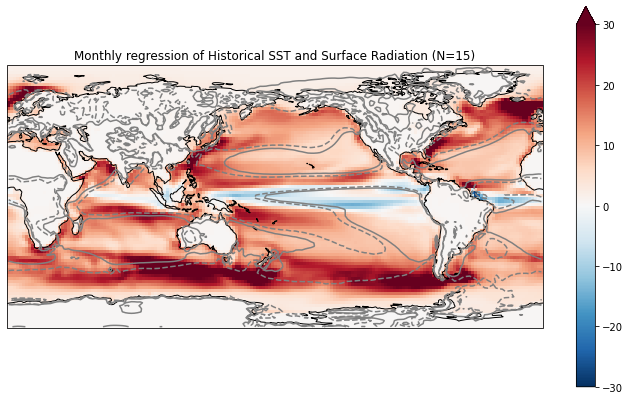

In [12]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_surface_fit_mean.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-30, vmax=30, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Monthly regression of Historical SST and Surface Radiation (N=15)')

Text(0.5, 1.0, 'Monthly regression of Historical SST and Surface Radiation (N=15)')

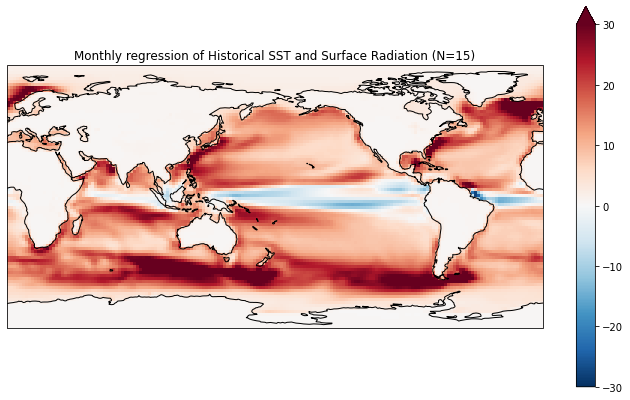

In [13]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_surface_fit_mean.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-30, vmax=30, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
plt.title('Monthly regression of Historical SST and Surface Radiation (N=15)')